In [11]:
from ipynb.fs.defs.MLCP_EDA import data_importing, replace_numbers_with_letters
import pandas as pd
import xgboost as xgb

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import precision_score

In [2]:
data = data_importing(verbose = False)

In [3]:
target = replace_numbers_with_letters(data[-1], mode = 'label')

In [4]:
dataset = pd.concat([data[1], target], axis = 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.iloc[:,:16], dataset.iloc[:,-1], test_size=0.2, stratify=dataset.iloc[:,-1], random_state=42)

In [6]:
y_train

6909    3
7762    3
2787    4
7858    4
1940    1
       ..
9327    2
7925    3
8233    0
2606    1
4358    1
Name: label, Length: 8000, dtype: int64

In [7]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# set the parameters:

param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 5}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

# training the model

bst = xgb.train(param, dtrain, num_round)

[08:44:14] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [8]:
preds = bst.predict(dtest)

In [9]:
preds

array([[0.203866  , 0.5008229 , 0.14694208, 0.11943996, 0.02892903],
       [0.10941271, 0.07776161, 0.01137302, 0.00917908, 0.7922735 ],
       [0.0052833 , 0.00618297, 0.00371717, 0.9702497 , 0.01456687],
       ...,
       [0.05084801, 0.7185211 , 0.14744107, 0.06729153, 0.01589826],
       [0.19701797, 0.08592342, 0.45485887, 0.10051111, 0.16168861],
       [0.010344  , 0.01259263, 0.8961461 , 0.03279433, 0.04812295]],
      dtype=float32)

0.7607244938769931


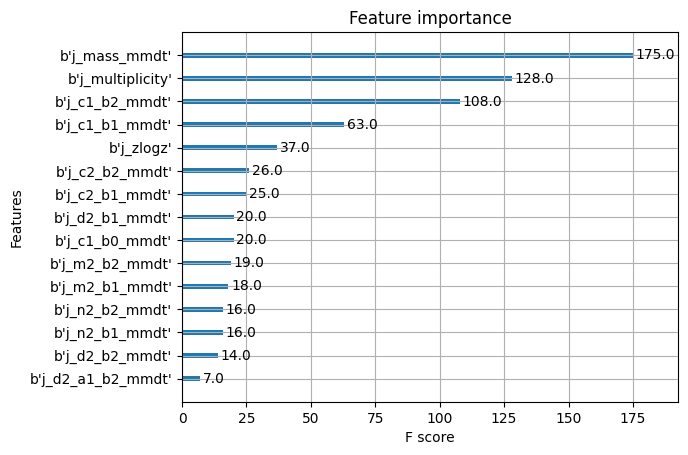

In [12]:
best_preds = np.asarray([np.argmax(line) for line in preds])
print(precision_score(y_test, best_preds, average="macro"))
ax = xgb.plot_importance(bst)